In [1]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter

sn.set()

from sklearn import metrics
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Link Dataset:

https://drive.google.com/file/d/1iP3EAChF-1GgyR6m2EIBj2ZYCvGh1DDL/view?usp=sharing

In [133]:
import zipfile

test_local_zip = '/content/Gigi Tampak Bawah-20240515T081311Z-001.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('./')

In [3]:
def loadImages(path):
    sample = []

    for filename in glob.glob(path):

        img = cv2.imread(filename)
        img = skimage.transform.resize(img, (224, 224, 3))
        IMG = np.array(img)
        sample.append(IMG)

    return sample

In [4]:
bengkak1 = '/content/Gigi Tampak Bawah/Bengkak Gusi/*.jpg'
bengkak2 = '/content/Gigi Tampak Bawah/Bengkak Gusi/*.jpeg'
bengkak3 = '/content/Gigi Tampak Bawah/Bengkak Gusi/*.png'
bukan1 = '/content/Gigi Tampak Bawah/Bukan Gambar Gigi/*.jpg'
bukan2 = '/content/Gigi Tampak Bawah/Bukan Gambar Gigi/*.jpeg'
bukan3 = '/content/Gigi Tampak Bawah/Bukan Gambar Gigi/*.png'
berlubang1 = '/content/Gigi Tampak Bawah/Gigi Berlubang/*.jpg'
berlubang2 = '/content/Gigi Tampak Bawah/Gigi Berlubang/*.jpeg'
berlubang3 = '/content/Gigi Tampak Bawah/Gigi Berlubang/*.png'
sehat1 = '/content/Gigi Tampak Bawah/Gigi Sehat/*.jpg'
sehat2 = '/content/Gigi Tampak Bawah/Gigi Sehat/*.jpeg'
sehat3 = '/content/Gigi Tampak Bawah/Gigi Sehat/*.png'
plak1 = '/content/Gigi Tampak Bawah/Plak Gigi/*.jpg'
plak2 = '/content/Gigi Tampak Bawah/Plak Gigi/*.jpeg'
plak3 = '/content/Gigi Tampak Bawah/Plak Gigi/*.png'

In [5]:
data_bengkak1 = loadImages(bengkak1)
data_bengkak2 = loadImages(bengkak2)
data_bengkak3 = loadImages(bengkak3)
data_bengkak = data_bengkak1 + data_bengkak2 + data_bengkak3

data_bukan1 = loadImages(bukan1)
data_bukan2 = loadImages(bukan2)
data_bukan3 = loadImages(bukan3)
data_bukan = data_bukan1 + data_bukan2 + data_bukan3

data_berlubang1 = loadImages(berlubang1)
data_berlubang2 = loadImages(berlubang2)
data_berlubang3 = loadImages(berlubang3)
data_berlubang = data_berlubang1 + data_berlubang2 + data_berlubang3

data_sehat1 = loadImages(sehat1)
data_sehat2 = loadImages(sehat2)
data_sehat3 = loadImages(sehat3)
data_sehat = data_sehat1 + data_sehat2 + data_sehat3

data_plak1 = loadImages(plak1)
data_plak2 = loadImages(plak2)
data_plak3 = loadImages(plak3)
data_plak = data_plak1 + data_plak2 + data_plak3

In [6]:
df_bengkak = pd.DataFrame({'image':data_bengkak, 'label': 'Bengkak Gusi'})
df_bukan = pd.DataFrame({'image':data_bukan, 'label': 'Bukan Gambar Gigi'})
df_berlubang = pd.DataFrame({'image':data_berlubang, 'label': 'Gigi Berlubang'})
df_sehat = pd.DataFrame({'image':data_sehat, 'label': 'Gigi Sehat'})
df_plak = pd.DataFrame({'image':data_plak, 'label': 'Plak Gigi'})

In [7]:
final_data = [df_bengkak, df_bukan, df_berlubang, df_sehat, df_plak]
final_data = pd.concat(final_data)

In [8]:
print("Entire data size:",final_data.shape)

Entire data size: (1252, 2)


In [9]:
train_data = final_data['image']
labels = final_data['label']
print("Labels Count:",Counter(np.array(labels)))

Labels Count: Counter({'Bukan Gambar Gigi': 400, 'Plak Gigi': 286, 'Gigi Sehat': 217, 'Gigi Berlubang': 191, 'Bengkak Gusi': 158})


In [10]:
onehot = LabelBinarizer()
labels = onehot.fit_transform(labels)
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_data, labels,
                                                  test_size = 0.2,
                                                  stratify = labels,
                                                  shuffle = True,
                                                  random_state = 42)

In [12]:
print('length X_train:', len(X_train))
print('length y_train:', len(y_train))

print('length X_test:',  len(X_test))
print('length y_test:', len(y_test))

length X_train: 1001
length y_train: 1001
length X_test: 251
length y_test: 251


In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [14]:
x_train= np.empty((len(X_train),X_train[0].shape[0],X_train[0].shape[1],X_train[0].shape[2]))
for i,x in enumerate(X_train):
    x_train[i]=X_train[i]
print(x_train.shape)

(1001, 224, 224, 3)


In [15]:
x_test= np.empty((len(X_test),X_test[0].shape[0],X_test[0].shape[1],X_test[0].shape[2]))
for i,x in enumerate(X_test):
    x_test[i]=X_test[i]
print(x_test.shape)

(251, 224, 224, 3)


In [16]:
from sklearn.utils.class_weight import compute_class_weight

# Mendapatkan nilai integer dari label one-hot encoded
y_integers = np.argmax(y_train, axis=1)

# Menghitung bobot kelas dengan mode 'balanced'
class_weights = compute_class_weight('balanced', classes=np.unique(y_integers), y=y_integers)

# Mengonversi ke dictionary untuk digunakan saat memanggil model.fit
d_class_weights = dict(enumerate(class_weights))
print(d_class_weights)

{0: 1.5888888888888888, 1: 0.625625, 2: 1.3084967320261438, 3: 1.1572254335260115, 4: 0.874235807860262}


In [17]:
x_train[0].shape

(224, 224, 3)

In [18]:
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionResNetV2(input_tensor=input_tensor, weights='imagenet', include_top=False)

219055592/219055592 [==============================] - 1s 0us/step


In [19]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

In [20]:
for layer in base_model.layers:
  layer.trainable = False

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 5, 5, 1536)        0         
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 batch_normalization_203 (B  (None, 38400)             153600    
 atchNormalization)                                              
                                                                 
 dense (Dense)               (None, 1024)              39322624  
                                                                 
 batch_normalization_204 (B  (None, 1024)              4

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',tensorflow.keras.metrics.AUC(name = 'auc'),tensorflow.keras.metrics.AUC(name = 'roc')])

In [23]:
history = model.fit(x_train, y_train, epochs=50,batch_size=16, validation_split=0.2)

Epoch 1/50
50/50 [==============================] - 34s 296ms/step - loss: 1.0357 - acc: 0.6413 - auc: 0.8877 - roc: 0.8877 - val_loss: 4.8920 - val_acc: 0.6567 - val_auc: 0.8296 - val_roc: 0.8296
Epoch 2/50
50/50 [==============================] - 8s 164ms/step - loss: 0.5360 - acc: 0.8200 - auc: 0.9652 - roc: 0.9652 - val_loss: 0.8634 - val_acc: 0.8308 - val_auc: 0.9475 - val_roc: 0.9475
Epoch 3/50
50/50 [==============================] - 8s 154ms/step - loss: 0.3604 - acc: 0.8788 - auc: 0.9825 - roc: 0.9825 - val_loss: 0.5518 - val_acc: 0.8706 - val_auc: 0.9684 - val_roc: 0.9684
Epoch 4/50
50/50 [==============================] - 9s 191ms/step - loss: 0.2134 - acc: 0.9287 - auc: 0.9923 - roc: 0.9923 - val_loss: 0.4998 - val_acc: 0.8706 - val_auc: 0.9793 - val_roc: 0.9793
Epoch 5/50
50/50 [==============================] - 9s 176ms/step - loss: 0.1756 - acc: 0.9450 - auc: 0.9950 - roc: 0.9950 - val_loss: 0.5042 - val_acc: 0.8706 - val_auc: 0.9761 - val_roc: 0.9761
Epoch 6/50
50/50 [=

In [24]:
# Getting Train and validation accuracy
x_train_acc, x_val_acc, y_train_acc, y_val_acc = train_test_split(x_train,y_train,
                                                  test_size = 0.2,
                                                  stratify = y_train,
                                                  shuffle = True,
                                                  random_state = 42)

In [25]:
pred_train = model.predict(x_train_acc, verbose = 1)
pred_train = onehot.inverse_transform(pred_train)
y_train_acc_labels = onehot.inverse_transform(y_train_acc)

pred_val = model.predict(x_val_acc, verbose = 1)
pred_val = onehot.inverse_transform(pred_val)
y_val_acc_labels = onehot.inverse_transform(y_val_acc)

pred_test = model.predict(x_test, verbose = 1)
pred_test = onehot.inverse_transform(pred_test)
y_test_labels = onehot.inverse_transform(y_test)

8/8 [==============================] - 5s 633ms/step


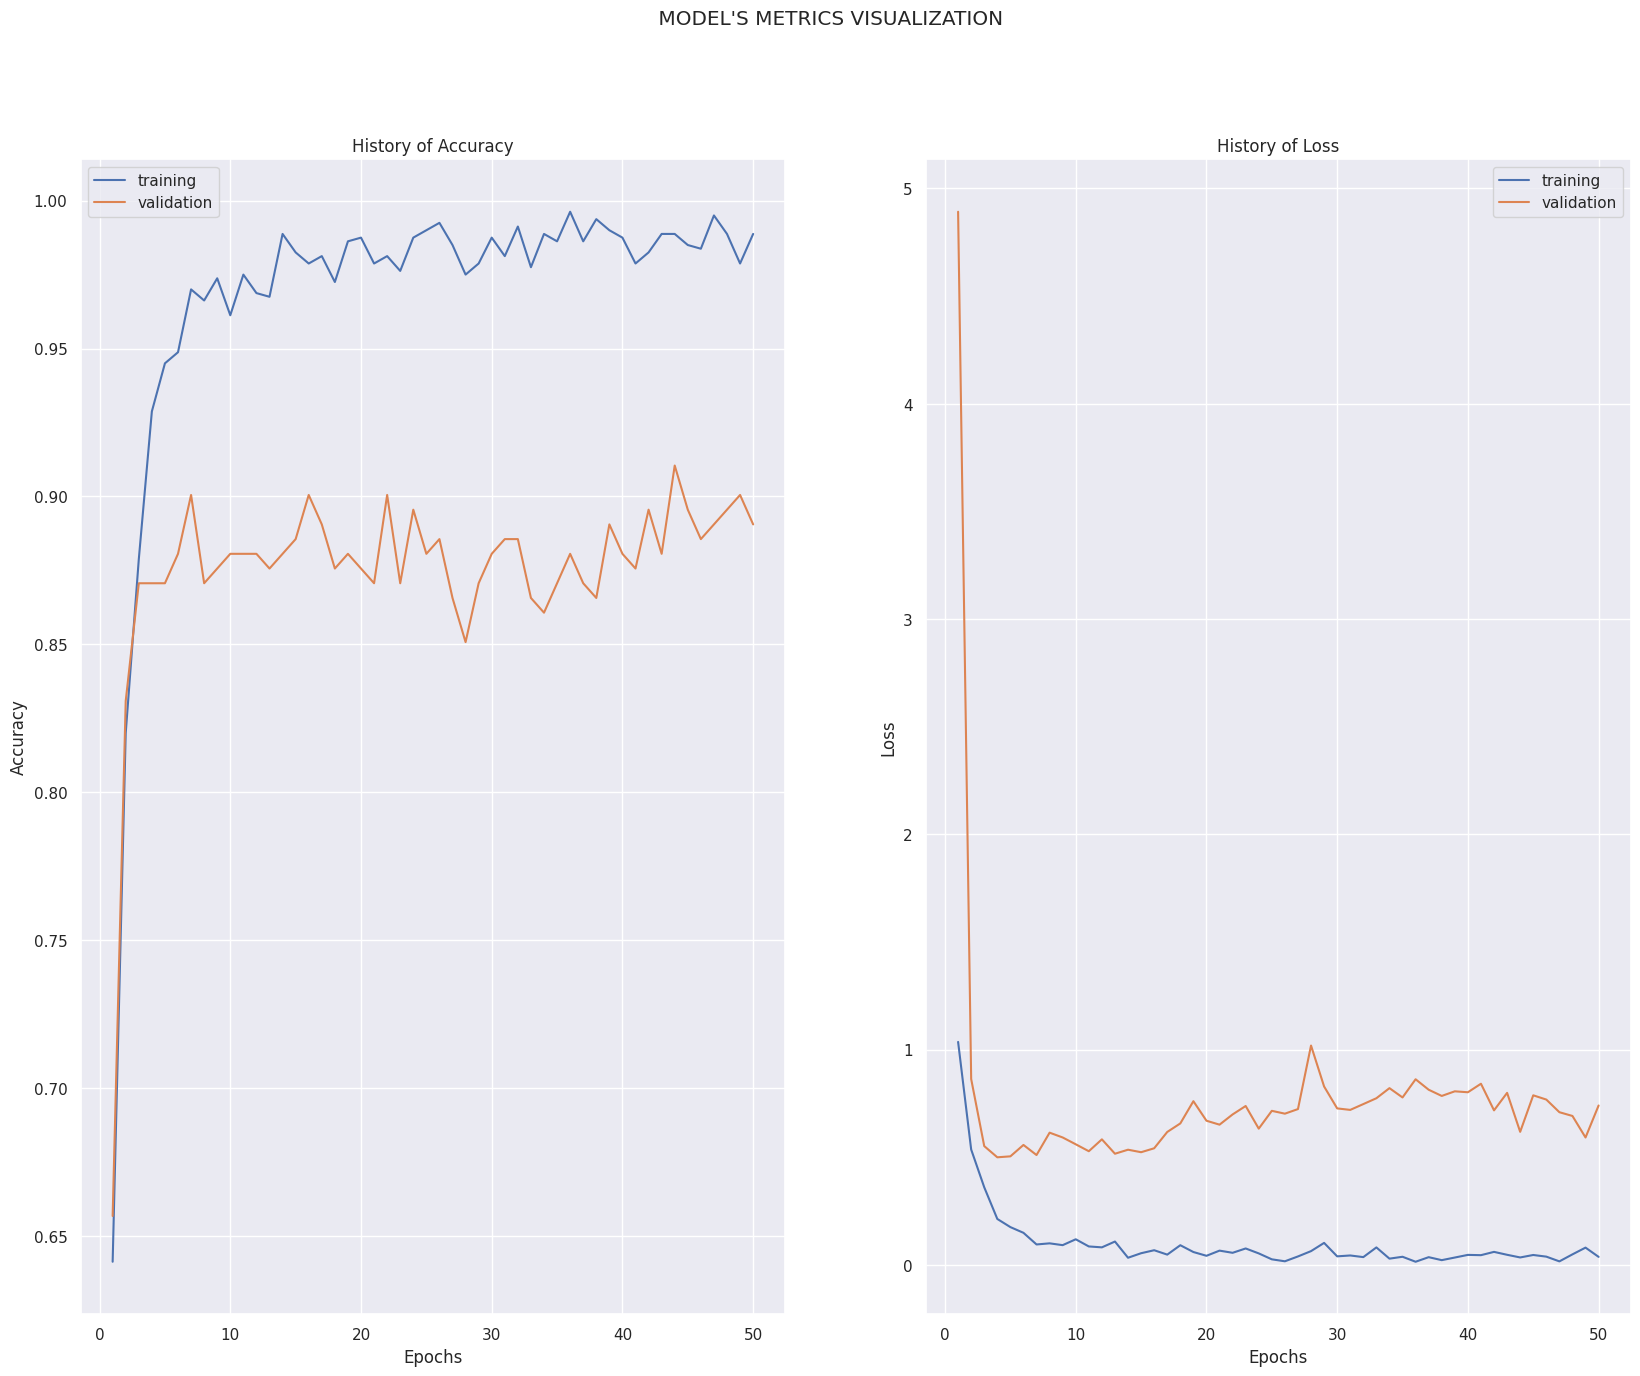

In [26]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,15))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()


Train_Val_Plot(history.history['acc'],history.history['val_acc'],
               history.history['loss'],history.history['val_loss'])

Counter({'Bukan Gambar Gigi': 256, 'Plak Gigi': 183, 'Gigi Sehat': 138, 'Gigi Berlubang': 122, 'Bengkak Gusi': 101})
Counter({'Bukan Gambar Gigi': 258, 'Plak Gigi': 178, 'Gigi Sehat': 140, 'Gigi Berlubang': 128, 'Bengkak Gusi': 96})


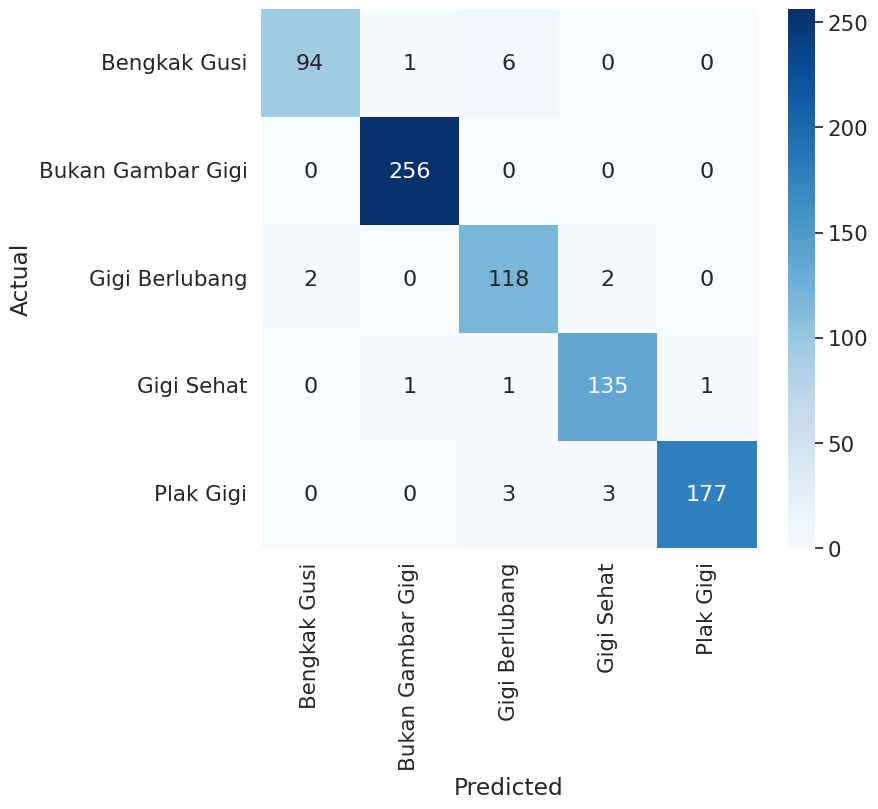

In [27]:
print(Counter(y_train_acc_labels))
print(Counter(pred_train))

conf_mx = confusion_matrix(y_train_acc_labels, pred_train)
conf_mx

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_train_acc_labels), index = np.unique(y_train_acc_labels))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,7))
sn.set(font_scale=1.4) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
plt.show()

Counter({'Bukan Gambar Gigi': 64, 'Plak Gigi': 46, 'Gigi Sehat': 35, 'Gigi Berlubang': 31, 'Bengkak Gusi': 25})
Counter({'Bukan Gambar Gigi': 64, 'Plak Gigi': 45, 'Gigi Sehat': 36, 'Gigi Berlubang': 31, 'Bengkak Gusi': 25})


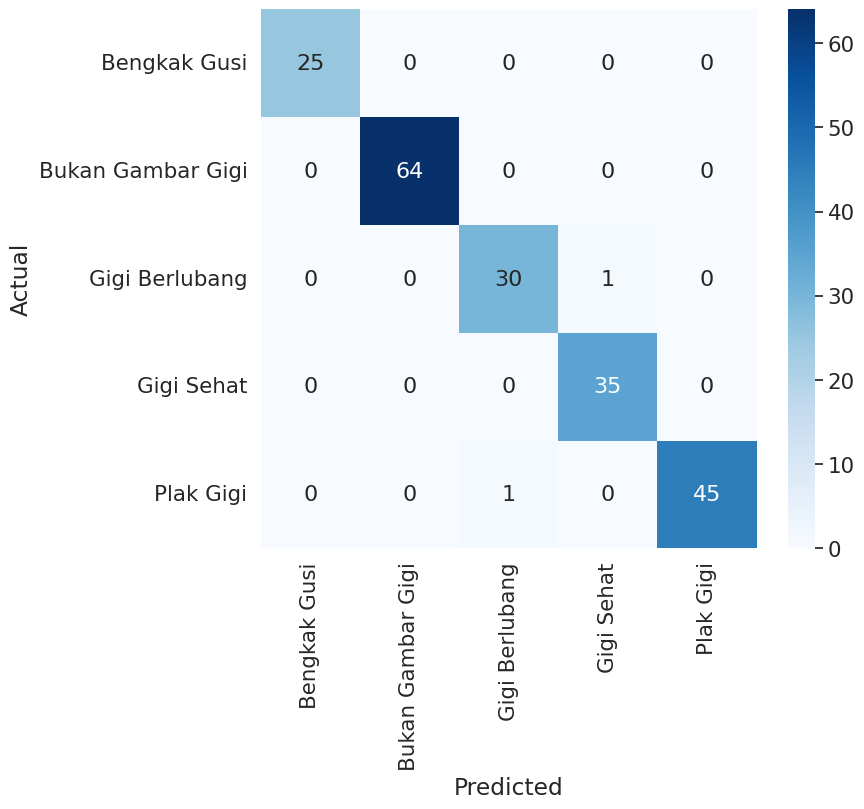

In [28]:
print(Counter(y_val_acc_labels))
print(Counter(pred_val))

conf_mx = confusion_matrix(y_val_acc_labels, pred_val)
conf_mx

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_val_acc_labels), index = np.unique(y_val_acc_labels))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,7))
sn.set(font_scale=1.4) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
plt.show()

Counter({'Bukan Gambar Gigi': 80, 'Plak Gigi': 57, 'Gigi Sehat': 44, 'Gigi Berlubang': 38, 'Bengkak Gusi': 32})
Counter({'Bukan Gambar Gigi': 80, 'Gigi Berlubang': 49, 'Plak Gigi': 46, 'Gigi Sehat': 45, 'Bengkak Gusi': 31})


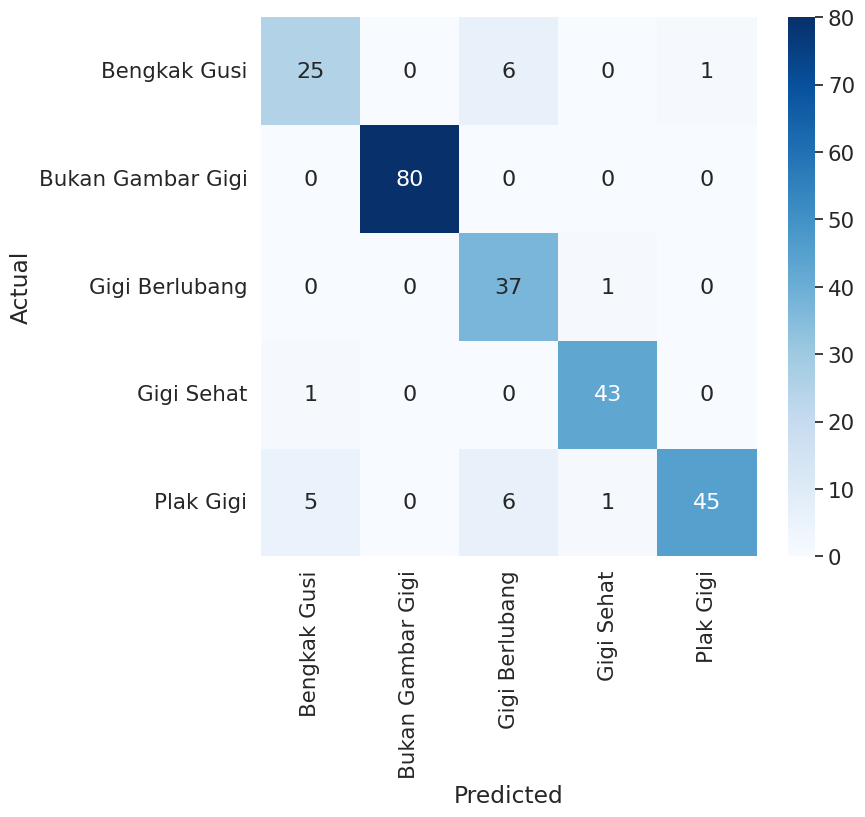

In [29]:
print(Counter(y_test_labels))
print(Counter(pred_test))

conf_mx = confusion_matrix(y_test_labels, pred_test)
conf_mx

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test_labels), index = np.unique(y_test_labels))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,7))
sn.set(font_scale=1.4) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
plt.show()

In [30]:
def print_performance_metrics(y_test, max_y_pred_test):
    print('Accuracy:', np.round(metrics.accuracy_score(y_test, max_y_pred_test),4))
    print('Precision:', np.round(metrics.precision_score(y_test, max_y_pred_test, average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, max_y_pred_test, average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, max_y_pred_test, average='weighted'),4))
    #print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test,  max_y_pred_test,multi_class='ovo', average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, max_y_pred_test),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, max_y_pred_test),4))
    print('\t\tClassification Report:\n', metrics.classification_report(y_test, max_y_pred_test))

In [31]:
print('------------------------ train set ------------------------')
print_performance_metrics(pred_train,y_train_acc_labels)

print('------------------------ validation set ------------------------')
print_performance_metrics(pred_val,y_val_acc_labels)

print('------------------------ test set ------------------------')
print_performance_metrics(pred_test,y_test_labels)

------------------------ train set ------------------------
Accuracy: 0.975
Precision: 0.9753
Recall: 0.975
F1 Score: 0.975
Cohen Kappa Score: 0.9678
Matthews Corrcoef: 0.9679
		Classification Report:
                    precision    recall  f1-score   support

     Bengkak Gusi       0.93      0.98      0.95        96
Bukan Gambar Gigi       1.00      0.99      1.00       258
   Gigi Berlubang       0.97      0.92      0.94       128
       Gigi Sehat       0.98      0.96      0.97       140
        Plak Gigi       0.97      0.99      0.98       178

         accuracy                           0.97       800
        macro avg       0.97      0.97      0.97       800
     weighted avg       0.98      0.97      0.97       800

------------------------ validation set ------------------------
Accuracy: 0.99
Precision: 0.9902
Recall: 0.99
F1 Score: 0.99
Cohen Kappa Score: 0.9872
Matthews Corrcoef: 0.9872
		Classification Report:
                    precision    recall  f1-score   support



In [38]:
# Save the model
model.save('tampak_bawah.h5')

Data Gambar untuk di tes:

https://drive.google.com/drive/folders/1weNu3ZLKEHOqaWvf2SAr4tdtGTPOtmUl?usp=sharing

In [33]:
import numpy as np
from PIL import Image

In [129]:
test_image= '/content/gigi7.jpg'

In [130]:
img = Image.open(test_image)
img = img.resize((224, 224))  # Resize the image to 224x224
img = np.array(img) / 255.0  # Normalize the image pixels to [0, 1]

In [131]:
# Add a batch dimension to the image
img = np.expand_dims(img, axis=0)

# Make predictions on the image
predictions = model.predict(img)

# Get the class probabilities
class_probabilities = predictions[0]

1/1 [==============================] - 0s 86ms/step


In [132]:
# Get the class with the highest probability
class_index = np.argmax(class_probabilities)
class_name = ['Bengkak Gusi', 'Bukan Gambar Gigi', 'Gigi Sehat','Gigi Berlubang','Plak Gigi'][class_index]

print(f'Predicted class: {class_name}')
print(f'Class probability: {class_probabilities[class_index]:.2f}')

Predicted class: Plak Gigi
Class probability: 0.99
